<a href="https://colab.research.google.com/github/hamdansyaif/DSA-Diabets/blob/main/Hands-On-ML2/Chapter-03/Chapter_3_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 🔧 Instalasi library yang dibutuhkan untuk Hands-on ML Chapter 3
!pip install --upgrade pip
!pip install numpy matplotlib scikit-learn pandas
!pip install numpy matplotlib scikit-learn
!pip install scipy

In [ ]:
!nvidia-smi

Tue Jun 17 12:04:24 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 576.40                 Driver Version: 576.40         CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 2060      WDDM  |   00000000:05:00.0  On |                  N/A |
|  0%   43C    P8             11W /  160W |    1194MiB /   6144MiB |      6%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib
import sys

print("Python version:", sys.version)
print("Scikit-learn:", sklearn.__version__)
print("NumPy:", np.__version__)
print("Pandas:", pd.__version__)
print("Matplotlib:", matplotlib.__version__)

Python version: 3.13.4 (tags/v3.13.4:8a526ec, Jun  3 2025, 17:46:04) [MSC v.1943 64 bit (AMD64)]
Scikit-learn: 1.7.0
NumPy: 2.3.0
Pandas: 2.3.0
Matplotlib: 3.10.3


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.datasets import fetch_openml

# Ambil ulang data MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)

# Bagi data menjadi training dan test (60k + 10k)
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]


In [ ]:
y = y.astype(np.uint8)

In [ ]:
print(f"Ukuran fitur (X): {X.shape}")
print(f"Ukuran label (y): {y.shape}")

Ukuran fitur (X): (70000, 784)
Ukuran label (y): (70000,)


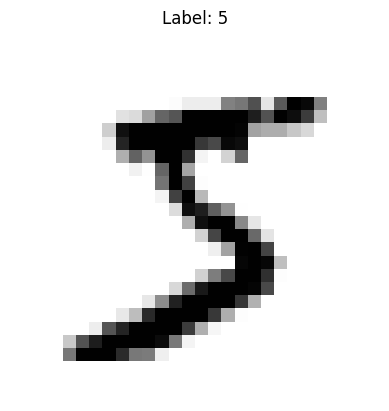

In [ ]:
# --- AMBIL CONTOH GAMBAR PERTAMA ---
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)  # Ubah kembali ke 2D untuk ditampilkan

# --- TAMPILKAN GAMBAR ---
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.title(f"Label: {y[0]}")
plt.show()


In [ ]:
# Target: True jika angka 5, False jika bukan
y_binary = (y == 5)

# Pisahkan train-test (data MNIST: 60.000 train pertama, 10.000 sisanya test)
X_train, X_test = X[:60000], X[60000:]
y_train_binary, y_test_binary = y_binary[:60000], y_binary[60000:]


In [ ]:
from sklearn.linear_model import SGDClassifier

# Inisialisasi model SGD
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_binary)  # training hanya untuk deteksi angka 5


,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [ ]:
prediction = sgd_clf.predict([some_digit])
print("Apakah ini angka 5? :", prediction[0])


Apakah ini angka 5? : True


In [ ]:
from sklearn.model_selection import cross_val_score

# Evaluasi dengan 3-fold cross-validation
cv_scores = cross_val_score(sgd_clf, X_train, y_train_binary, cv=3, scoring="accuracy")
print("Cross-Validation Accuracy (3 fold):", cv_scores)
print("Mean Accuracy:", cv_scores.mean())


Cross-Validation Accuracy (3 fold): [0.95035 0.96035 0.9604 ]
Mean Accuracy: 0.9570333333333334


In [ ]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X),), dtype=bool)  # Selalu prediksi "bukan 5"

never_5_clf = Never5Classifier()
dummy_scores = cross_val_score(never_5_clf, X_train, y_train_binary, cv=3, scoring="accuracy")

print("Dummy Classifier Accuracy (Never 5):", dummy_scores)
print("Mean Dummy Accuracy:", dummy_scores.mean())


Dummy Classifier Accuracy (Never 5): [0.91125 0.90855 0.90915]
Mean Dummy Accuracy: 0.90965


In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_binary, cv=3)


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_binary, y_train_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[53892   687]
 [ 1891  3530]]


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_train_binary, y_train_pred)
recall = recall_score(y_train_binary, y_train_pred)
f1 = f1_score(y_train_binary, y_train_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")


Precision: 0.8371
Recall:    0.6512
F1 Score:  0.7325


In [ ]:
# Ambil skor decision function (bukan hasil klasifikasi binary)
y_scores = cross_val_predict(sgd_clf, X_train, y_train_binary, cv=3, method="decision_function")


In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_binary, y_scores)


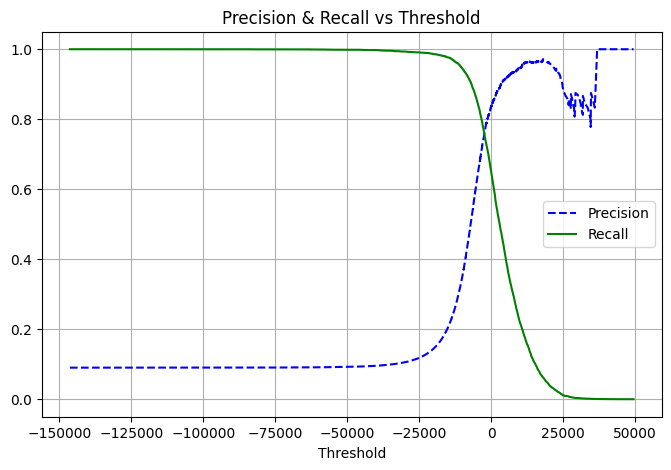

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center right")
    plt.grid(True)
    plt.title("Precision & Recall vs Threshold")

plt.figure(figsize=(8, 5))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()


In [ ]:
# Ambil threshold pertama yang mencapai minimal 90% precision
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
print("Threshold untuk precision ≥ 90%:", threshold_90_precision)


Threshold untuk precision ≥ 90%: 3370.0194991439557


In [ ]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

from sklearn.metrics import precision_score, recall_score

print("Precision (≥90% threshold):", precision_score(y_train_binary, y_train_pred_90))
print("Recall (≥90% threshold):", recall_score(y_train_binary, y_train_pred_90))


Precision (≥90% threshold): 0.9000345901072293
Recall (≥90% threshold): 0.4799852425751706


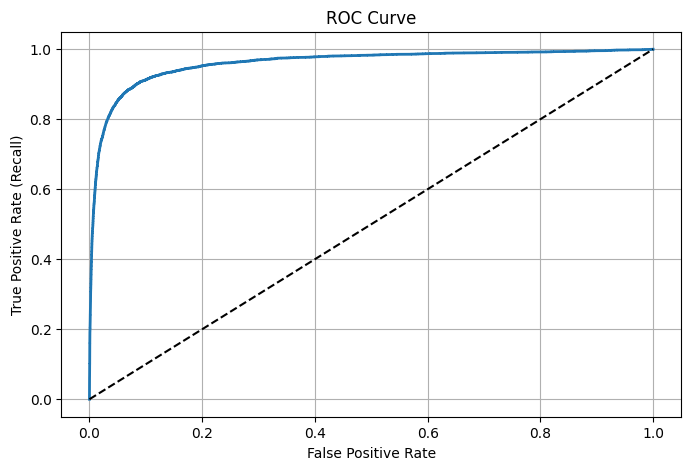

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, roc_thresholds = roc_curve(y_train_binary, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label if label else "ROC")
    plt.plot([0, 1], [0, 1], 'k--')  # garis acak
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.title("ROC Curve")
    plt.grid(True)

plt.figure(figsize=(8, 5))
plot_roc_curve(fpr, tpr)
plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_train_binary, y_scores)
print("ROC AUC Score:", roc_auc)


ROC AUC Score: 0.9604938554008616


In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)


,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [ ]:
# Prediksi untuk some_digit (yang tadi kita tampilkan)
sgd_pred = sgd_clf.predict([some_digit])
print("Prediksi angka:", sgd_pred[0])
print("Label asli:", y[0])


Prediksi angka: 3
Label asli: 5


In [ ]:
from sklearn.model_selection import cross_val_score

sgd_scores = cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")
print("Multiclass Accuracy:", sgd_scores)
print("Rata-rata Akurasi:", sgd_scores.mean())


Multiclass Accuracy: [0.87365 0.85835 0.8689 ]
Rata-rata Akurasi: 0.8669666666666668


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

sgd_scores_scaled = cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")
print("Akurasi setelah scaling:", sgd_scores_scaled)
print("Rata-rata akurasi:", sgd_scores_scaled.mean())


Akurasi setelah scaling: [0.8983 0.891  0.9018]
Rata-rata akurasi: 0.8970333333333333


In [ ]:
from sklearn.svm import SVC

svc_clf = SVC(gamma="auto")
svc_clf.fit(X_train[:1000], y_train[:1000])  # subset kecil karena lambat

svc_pred = svc_clf.predict([some_digit])
print("Prediksi SVC:", svc_pred[0])


Prediksi SVC: 5


In [ ]:
from sklearn.model_selection import cross_val_predict

# Gunakan model SGDClassifier yang sudah dilatih
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)


In [ ]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix:\n", conf_mx)


Confusion Matrix:
 [[5577    0   22    5    8   43   36    6  225    1]
 [   0 6400   37   24    4   44    4    7  212   10]
 [  27   27 5220   92   73   27   67   36  378   11]
 [  22   17  117 5227    2  203   27   40  403   73]
 [  12   14   41    9 5182   12   34   27  347  164]
 [  27   15   30  168   53 4444   75   14  535   60]
 [  30   15   42    3   44   97 5552    3  131    1]
 [  21   10   51   30   49   12    3 5684  195  210]
 [  17   63   48   86    3  126   25   10 5429   44]
 [  25   18   30   64  118   36    1  179  371 5107]]


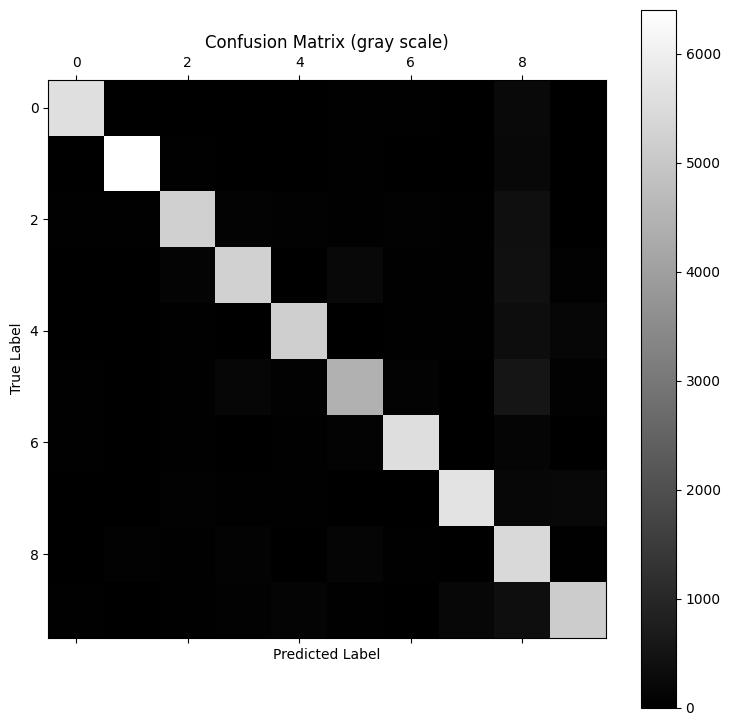

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,9))
plt.matshow(conf_mx, cmap=plt.cm.gray, fignum=1)
plt.title("Confusion Matrix (gray scale)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.colorbar()
plt.show()


<Figure size 900x900 with 0 Axes>

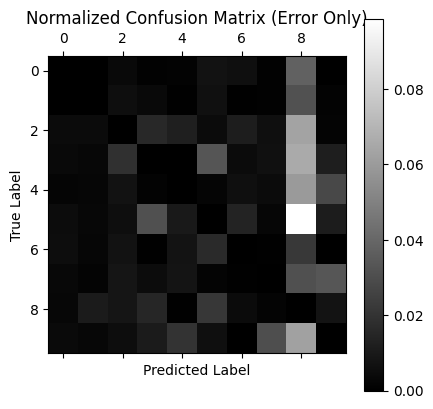

In [ ]:
# Hitung rasio per baris (jumlah total label sesungguhnya)
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

# Set diagonal (benar prediksi) ke 0 agar fokus ke kesalahan
np.fill_diagonal(norm_conf_mx, 0)

plt.figure(figsize=(9,9))
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.title("Normalized Confusion Matrix (Error Only)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.colorbar()
plt.show()


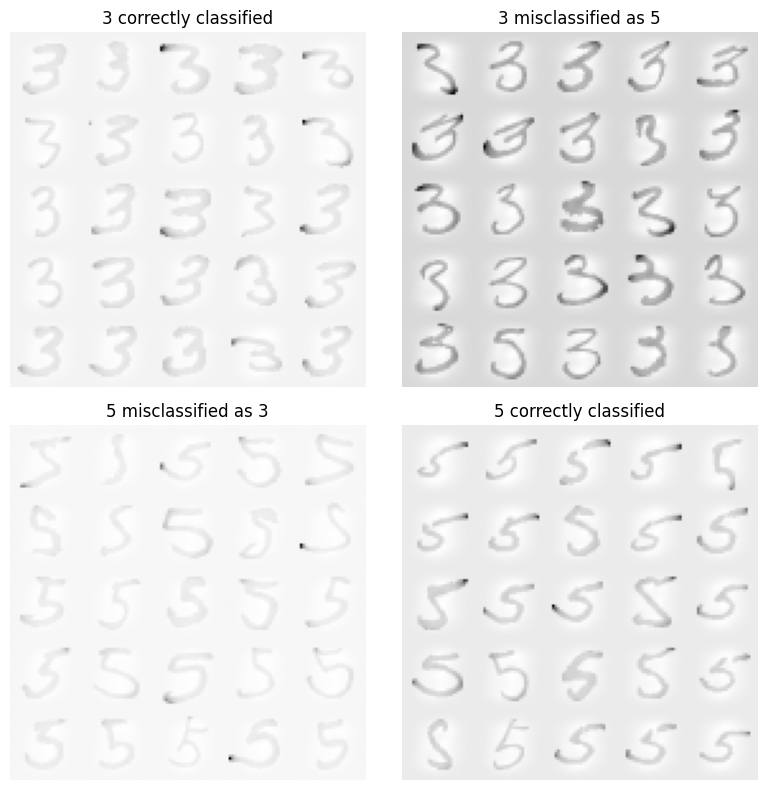

In [ ]:
def plot_digits(instances, images_per_row=10):
    size = 28
    images_per_row = min(images_per_row, len(instances))
    n_rows = (len(instances) - 1) // images_per_row + 1
    padded = np.concatenate([instances, np.zeros((n_rows * images_per_row - len(instances), 784))])
    images = padded.reshape((n_rows, images_per_row, size, size))
    big_image = images.transpose(0, 2, 1, 3).reshape(n_rows * size, images_per_row * size)
    plt.imshow(big_image, cmap=plt.cm.binary)
    plt.axis("off")

cl_a, cl_b = 3, 5
X_aa = X_train_scaled[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train_scaled[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train_scaled[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train_scaled[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5); plt.title(f"{cl_a} correctly classified")
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5); plt.title(f"{cl_a} misclassified as {cl_b}")
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5); plt.title(f"{cl_b} misclassified as {cl_a}")
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5); plt.title(f"{cl_b} correctly classified")
plt.tight_layout()
plt.show()


In [ ]:
# Label 1: True jika angka ≥ 7
y_train_large = (y_train >= 7)

# Label 2: True jika angka ganjil
y_train_odd = (y_train % 2 == 1)

# Gabungkan jadi multilabel (dua kolom)
y_multilabel = np.c_[y_train_large, y_train_odd]
print("Contoh multilabel untuk angka", y_train[0], ":", y_multilabel[0])


Contoh multilabel untuk angka 5 : [False  True]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [ ]:
some_digit_pred = knn_clf.predict([X_train[0]])
print("Label asli:", y_multilabel[0])
print("Prediksi   :", some_digit_pred[0])


Label asli: [False  True]
Prediksi   : [False  True]


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score

y_train_pred_multi = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1 = f1_score(y_multilabel, y_train_pred_multi, average="macro")
print("F1 Score (Multilabel - Macro):", f1)


F1 Score (Multilabel - Macro): 0.9764102655606048


In [ ]:
# Tambahkan noise acak 0–99 ke semua piksel
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_noisy = X_train + noise

noise_test = np.random.randint(0, 100, (len(X_test), 784))
X_test_noisy = X_test + noise_test

# Label target = gambar asli (tanpa noise)
y_train_denoise = X_train
y_test_denoise = X_test


In [ ]:
knn_clf.fit(X_train_noisy, y_train_denoise)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


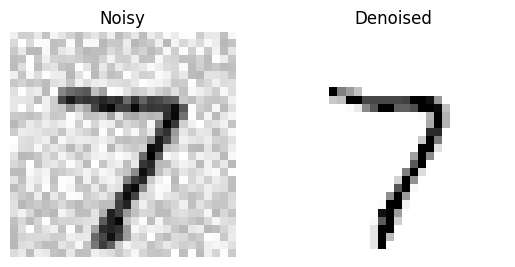

In [ ]:
# Uji dengan satu contoh noisy
some_index = 0
noisy_digit = X_test_noisy[some_index]
clean_digit = knn_clf.predict([noisy_digit])

# Tampilkan hasil
def plot_digit(data):
    plt.imshow(data.reshape(28, 28), cmap="binary")
    plt.axis("off")

plt.subplot(1, 2, 1)
plot_digit(noisy_digit)
plt.title("Noisy")

plt.subplot(1, 2, 2)
plot_digit(clean_digit)
plt.title("Denoised")

plt.show()


# **Exercise**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)

grid_search.best_params_
grid_search.best_score_

from sklearn.metrics import accuracy_score
y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.972 total time=  10.5s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.971 total time=  10.7s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  10.4s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  10.6s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.970 total time=  10.8s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  10.3s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  10.4s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  10.7s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  10.1s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.971 total time=  10.6s
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.969 total time=  10.8s
[CV 2/5] END ....n_neighbors=4, weights=uniform;,

0.9714

In [ ]:
from scipy.ndimage.interpolation import shift

def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])


C:\Users\hamda\AppData\Local\Temp\ipykernel_16004\2785426931.py:1: DeprecationWarning: Please import `shift` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.interpolation import shift


In [ ]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)


In [ ]:
X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

# Shuffle
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

# Gunakan best parameter dari grid search
knn_clf = KNeighborsClassifier(**grid_search.best_params_)
knn_clf.fit(X_train_augmented, y_train_augmented)


,n_neighbors,4
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [ ]:
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)


0.9763